In [1]:
import pandas as pd

df = pd.read_csv('/content/1.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
print(df.dtypes)
df.head()


timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                         object
zone1_temperature                       object
zone1_humidity                          object
zone2_temperature                       object
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humidity                         float64
outdoor_tempe

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778597,33.74660934,47.59666667,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30,19.89,46.69333333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40,33.74660934,46.06666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410390,45.410390
4,2016-01-11 17:40:00,60.0,40,19.89,46.33333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [2]:
# Convert all columns except 'timestamp' to numeric
for col in df.columns:
    if col != 'timestamp':
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16279 non-null  datetime64[ns]
 1   equipment_energy_consumption  15466 non-null  float64       
 2   lighting_energy               15452 non-null  float64       
 3   zone1_temperature             15367 non-null  float64       
 4   zone1_humidity                15427 non-null  float64       
 5   zone2_temperature             15391 non-null  float64       
 6   zone2_humidity                15444 non-null  float64       
 7   zone3_temperature             15504 non-null  float64       
 8   zone3_humidity                15433 non-null  float64       
 9   zone4_temperature             15490 non-null  float64       
 10  zone4_humidity                15526 non-null  float64       
 11  zone5_temperature           

In [3]:
  print(df.head())

            timestamp  equipment_energy_consumption  lighting_energy  \
0 2016-01-11 17:00:00                          60.0       -77.787786   
1 2016-01-11 17:10:00                          60.0        30.000000   
2 2016-01-11 17:20:00                          50.0        30.000000   
3 2016-01-11 17:30:00                          50.0        40.000000   
4 2016-01-11 17:40:00                          60.0        40.000000   

   zone1_temperature  zone1_humidity  zone2_temperature  zone2_humidity  \
0          33.746609       47.596667               19.2       44.790000   
1          19.890000       46.693333               19.2       44.722500   
2          19.890000       46.300000               19.2       44.626667   
3          33.746609       46.066667               19.2       44.590000   
4          19.890000       46.333333               19.2       44.530000   

   zone3_temperature  zone3_humidity  zone4_temperature  ...  \
0              19.79             NaN          19.000

In [4]:
df.shape


(16281, 29)

In [5]:
# Replace missing values in each column with its median
for col in df.columns:
    if col != 'timestamp':
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

# checking missing values
print(df.isnull().sum())


timestamp                       2
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
dtype: int64


<ipython-input-5-2c1f4f9b102c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [6]:
df.drop(columns=['random_variable2'], inplace=True)
df.to_csv('/content/1_cleaned.csv', index=False)

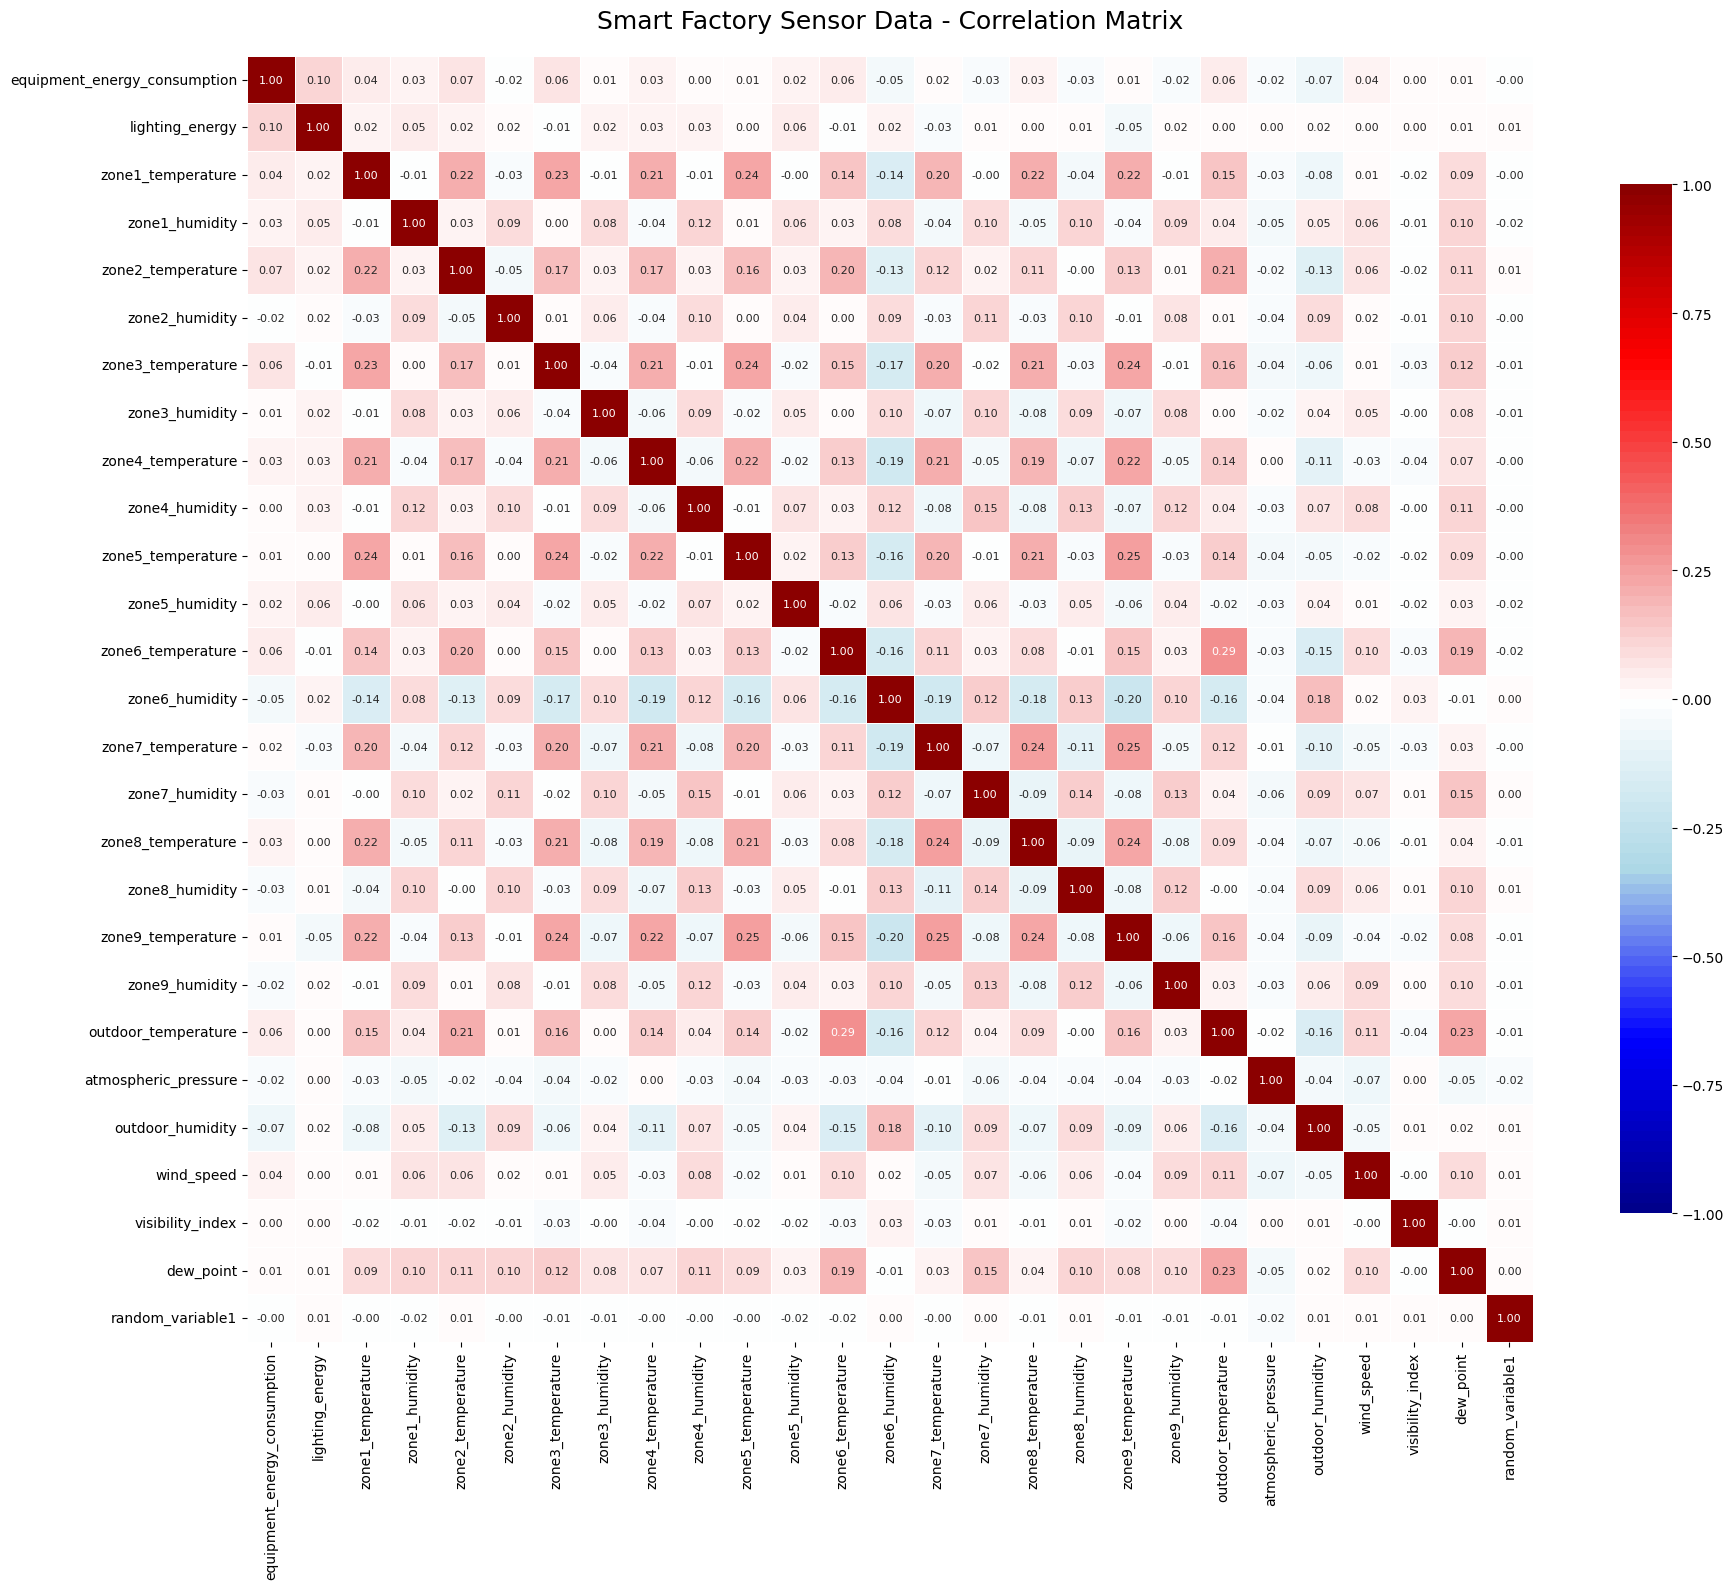

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Ensure plots are displayed inline
%matplotlib inline

# Calculate the correlation matrix
corr_matrix = df.drop(columns=['timestamp']).corr()
plt.figure(figsize=(20, 16))
colors = ["darkblue", "blue", "lightblue", "white", "lightcoral", "red", "darkred"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=100)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap=cmap,
    vmin=-1, vmax=1,
    linewidths=0.5,
    annot_kws={"size": 8},
    square=True,

    cbar_kws={"shrink": 0.8}
)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Smart Factory Sensor Data - Correlation Matrix', fontsize=18, pad=20)
plt.tight_layout()
plt.show()

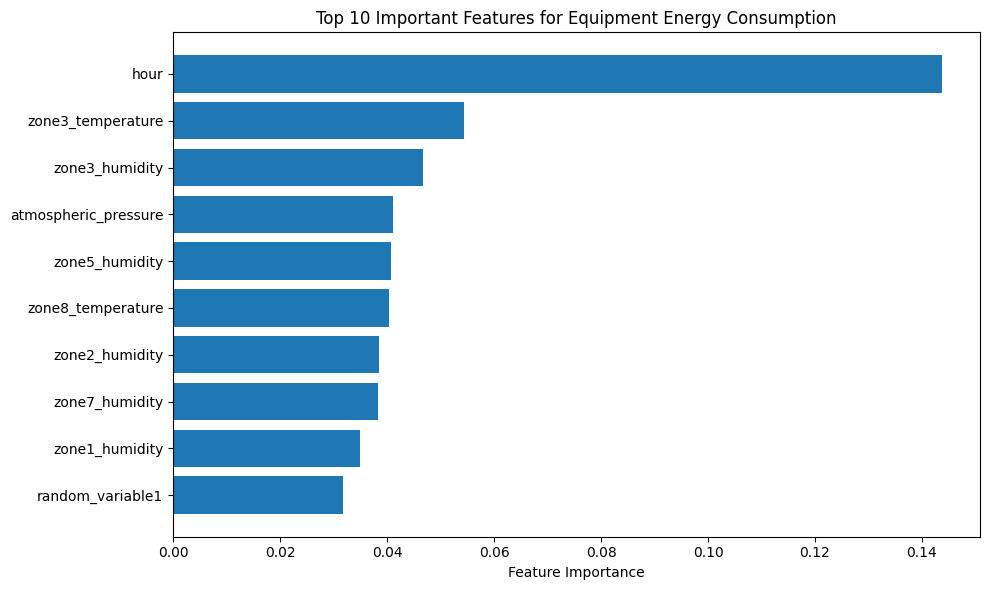


Top 10 Important Features:
                 Feature  Importance
26                  hour    0.143673
5      zone3_temperature    0.054361
6         zone3_humidity    0.046649
20  atmospheric_pressure    0.041009
10        zone5_humidity    0.040768
15     zone8_temperature    0.040375
4         zone2_humidity    0.038551
14        zone7_humidity    0.038361
2         zone1_humidity    0.035018
25      random_variable1    0.031707


In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load your dataset
df = pd.read_csv("/content/1_cleaned.csv")

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
target = 'equipment_energy_consumption'
features = df.drop(columns=[target, 'timestamp'])  # Drop nneeded columns


X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature
importances = model.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features for Equipment Energy Consumption')
plt.tight_layout()
plt.show()

print("\nTop 10 Important Features:")
print(importance_df.head(10))


In [17]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 103.21822852567269


In [18]:
r2 = r2_score(y_test, y_pred)
print("R²:", r2)


R²: -0.05910534352650876
